In [23]:
import sys
sys.path.append('../')

In [24]:
import pandas as pd
import numpy as np
from utils.perceptron import build_step_perceptron

In [25]:
and_df = pd.DataFrame(data={
    "in_1" : [-1, -1,  1,  1],
    "in_2" : [-1,  1, -1,  1],
    "out"  : [-1, -1, -1,  1]
})

In [26]:
and_df

,in_1,in_2,out
0,-1,-1,-1
1,-1,1,-1
2,1,-1,-1
3,1,1,1


In [27]:
p, errors = build_step_perceptron(and_df, "out", 0.001, 100000)

In [28]:
p.predict(and_df[["in_1", "in_2"]].to_numpy())

array([[-1],
       [-1],
       [-1],
       [ 1]])

In [29]:
line_x = np.linspace(-5, 5, 20, True)
line_x

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [30]:
line_y = np.zeros(line_x.shape)
for i in range(line_x.shape[0]):
    line_y[i] = -(p.w[0][0]/p.w[0][1])*line_x[i] - (p.w[0][2]/p.w[0][1])
line_y 

array([ 14.23871159,  12.90402326,  11.56933493,  10.23464659,
         8.89995826,   7.56526993,   6.2305816 ,   4.89589327,
         3.56120494,   2.22651661,   0.89182828,  -0.44286005,
        -1.77754838,  -3.11223671,  -4.44692504,  -5.78161337,
        -7.1163017 ,  -8.45099003,  -9.78567836, -11.12036669])

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

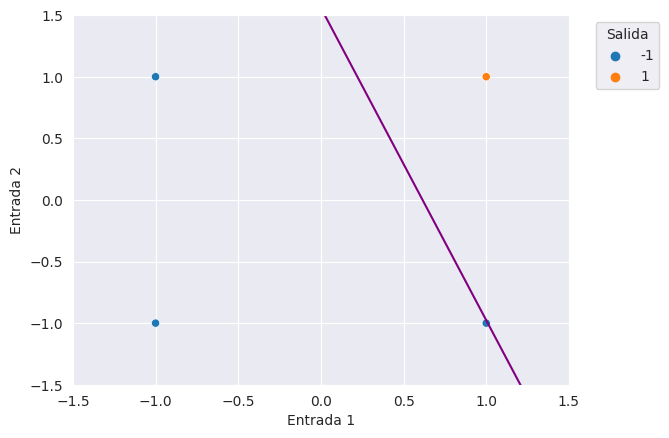

In [32]:
sns.set_style("darkgrid")
sns.scatterplot(and_df, x="in_1", y="in_2", hue="out", palette=sns.color_palette(None, 2))
plt.plot(line_x, line_y, color="purple")
plt.ylim((-1.5, 1.5))
plt.xlim((-1.5, 1.5))
plt.xlabel("Entrada 1")
plt.ylabel("Entrada 2")
plt.legend(title="Salida", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

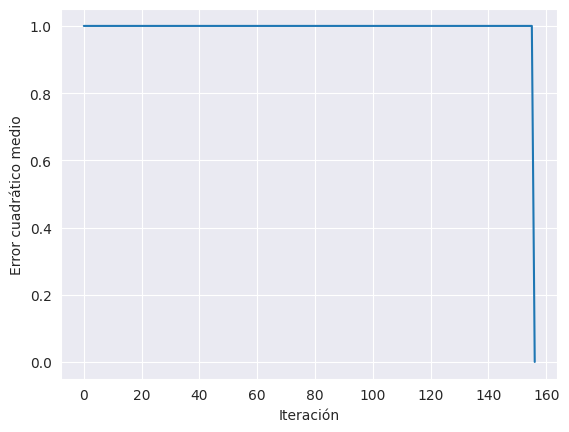

In [33]:
sns.set_style("darkgrid")
plt.plot(list(range(len(errors))), errors)
plt.xlabel("Iteración")
plt.ylabel("Error cuadrático medio")
plt.show()